# Homework 1 - Andrea Lazzari


First assigment of the Physical Models of Complex Systems course:

* Solve the Quasi Stationary Approximation of the Consumer Resource Model with 1 species and 1 abiotic resource and compare it numerically with the full equation.

* Write the Fokker Plank Equation associated to the stochastic logistic equation with environmental noise and solve the stationary solution $P^*$

# Consumer and Resource Models

### Biotic resources

In this first analyzed case the resources are other species, ina  sort of predator-prey situation

\begin{cases}

\dfrac{dN(t)}{dt} = N(t) \cdot \big( \gamma \cdot c \cdot R(t) - d \big) \\

\\ 
\dfrac{dR(t)}{dt} = R(t) \cdot a \big( 1 - \dfrac{R(t)}{k_c} \big) - c \cdot N(t) \cdot R(t)

\end{cases}


The first equation represents the Consumer dynamic:

* $\gamma \cdot c$ it is the growth rate, the efficiency of resources $R(t)$ taken and *"transformed in growth"* 
* $\gamma \cdot c \cdot R(t)$ it is the birth term
* $d$ is the death rate



The second equation is instead representative of the Resource dynamic:

* $a$ is the growth rate of the resources
  
* $R(t) \cdot a \big( 1 - \dfrac{R(t)}{k_c} \big)$ characterize the growth term and $k_c$ is the carrying capacity that acts for the total number of individuals that resources can support

* $c \cdot N(t) \cdot R(t)$ stands for the consumption of resources done by every generation of consumer with efficiency $c$



## Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy.integrate import odeint


In [38]:
c = 1/100        # consumption rate
gamma = 2      #"efficiency" of the consumer
d = 1/5          # death rate

k_c = 100     # carrying capacity
a = 1          # growth rate


N0 = 10

initial_R = k_c -((k_c * c * N0)/a)    # In order to have the same initial conditions as in the case QSA

def system(y, t, c, d, k_c, a , gamma):
    N, R = y
   
    
    dN_dt =  N * ((gamma * c * R) - d)  # Population
    dR_dt = (R * a*(1 - (R/k_c))) - c * N * R   # Resource 
    
    return [dN_dt, dR_dt]

t = np.linspace(0, 250, 1000)   # time_domain

y0 = [N0, initial_R]   # initial conditions

solution = odeint(system, y0, t, args=(c, d, k_c, a, gamma))


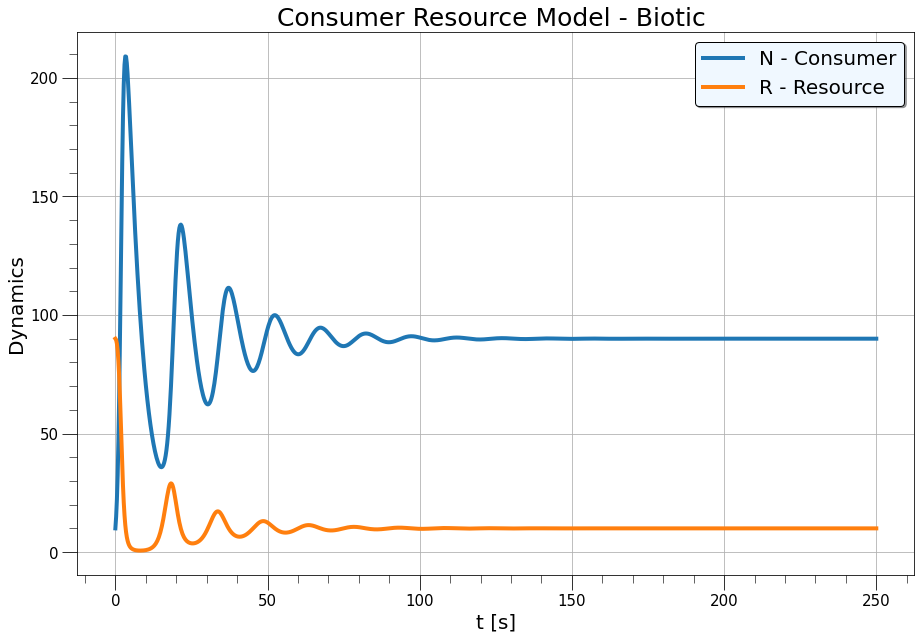

In [39]:
# plotting the result
fig , ax = plt.subplots(figsize=(15,10))

ax.plot(t, solution[:,0], linewidth = 4, label = 'N - Consumer')    # plot N - consumer to t 
ax.plot(t, solution[:,1], linewidth = 4, label = 'R - Resource')    # plot Resource to t
ax.set_title('Consumer Resource Model - Biotic ', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Dynamics', fontsize = 20)         

ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

In the Quasi Static Approximation, the system is simplified to:

$$ \boxed{ R^* = k_c - \dfrac{k_c \cdot c \cdot N(t)}{a}}$$

and this leads to the following equation:

$$ \dfrac{dN(t)}{dt} = N(t) \cdot \bigg[ \gamma \cdot c \cdot \underbrace{\big(k_c - \dfrac{k_c \cdot c \cdot N(t)}{a} \big)}_{R^*} - d \bigg]$$

Calling:

$$ \tilde{k} = \gamma \cdot c \cdot k_c - d$$
$$ \tilde{a} = \gamma \cdot c^2 \cdot \dfrac{k_c}{a}$$

we can rewrite the equation as:

$$
    \dfrac{1}{N(t)} \cdot \dfrac{dN(t)}{dt} = \tilde{k} \cdot \left( 1 - \dfrac{\tilde{a}}{\tilde{k}} \cdot N(t) \right)
$$

which is the equation for the **logistic curve**. Rewriting:

$$ \mu = \tilde{k}$$
$$ k = \dfrac{\tilde{k}}{\tilde{a}}$$

I obtain:

$$ \dfrac{dN(t)}{dt} = \mu \cdot N(t)\bigg( 1 - \dfrac{N(t)}{k} \bigg) $$

that can be solved by separation of variables leading to:
$$
   \boxed{ N(t) = N(0) \cdot e^{\mu t} \left(1 + \frac{N(0)}{k} (e^{\mu t} - 1) \right)^{-1} }
$$
which correctly reproduces the dynamics that is experimentally observed for bacteria.


## QSA simulation

In [40]:
#parameters of the model

c = 1/100        # consumption rate
gamma = 2      #"efficiency" of the consumer
d = 1/5          # death rate

k_c = 100     # carrying capacity
a = 1          # growth rate


def N_qsa_evol(N0, t, gamma, k_c, c, a, d):
    mu = ((gamma * c * k_c) - d)
    k = mu/(gamma * c**2 * (k_c/a))
    return N0 * np.exp(mu*t) * ((1 + ((N0/k)*(np.exp(mu*t)-1)))**(-1))
           
time_vec = np.linspace(0, 250, 1000)
Ninit = 10

N_qsa = N_qsa_evol(Ninit, time_vec, gamma, k_c, c, a, d)

R_qsa = k_c -((k_c * c * N_qsa)/a)

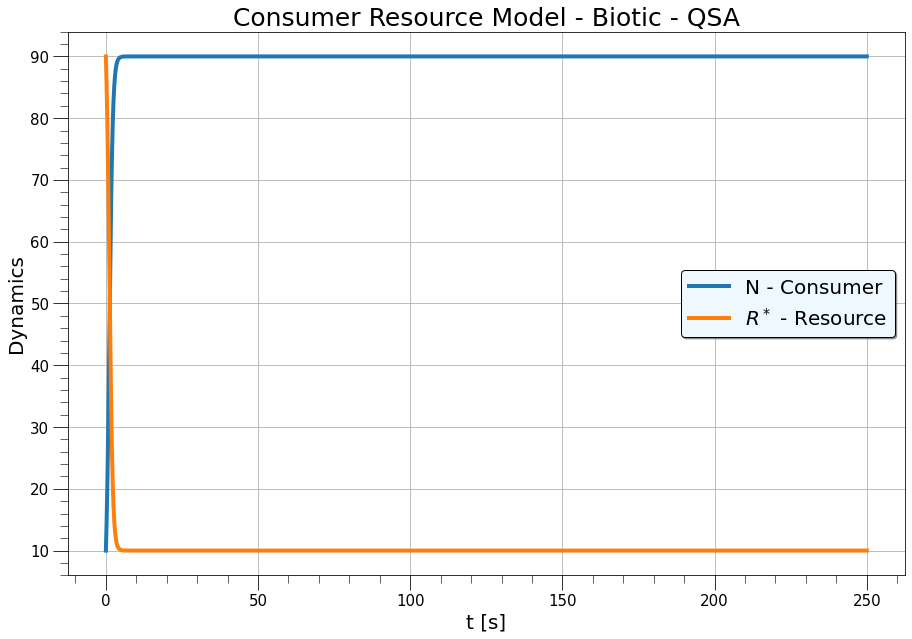

In [41]:
# plotting the result
fig , ax = plt.subplots(figsize=(15,10))

ax.plot(time_vec, N_qsa, linewidth = 4, label = 'N - Consumer')    # plot N - consumer to t 

ax.plot(time_vec, R_qsa, linewidth = 4, label = '$R^*$ - Resource')    # plot Resource to t

ax.set_title('Consumer Resource Model - Biotic - QSA', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Dynamics', fontsize = 20)         

ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

### Union of Full Derivation and QSA

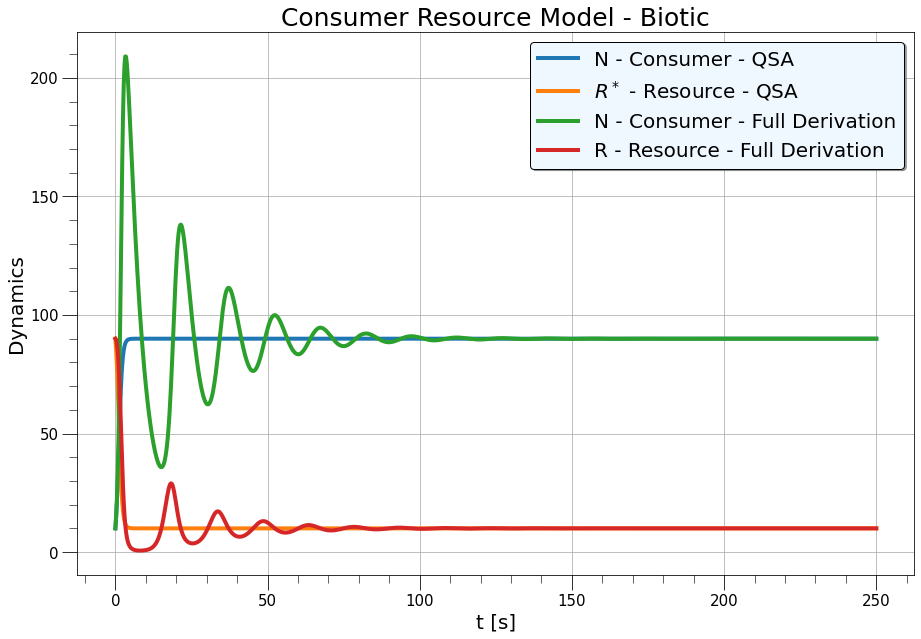

In [42]:
# plotting the result
fig , ax = plt.subplots(figsize=(15,10))

#QSA
ax.plot(time_vec, N_qsa, linewidth = 4, label = 'N - Consumer - QSA')    # plot N - consumer to t 
ax.plot(time_vec, R_qsa, linewidth = 4, label = '$R^*$ - Resource - QSA')    # plot Resource to t

#Full solution
ax.plot(t, solution[:,0], linewidth = 4, label = 'N - Consumer - Full Derivation')                # plot N - consumer to t 
ax.plot(t, solution[:,1], linewidth = 4, label = 'R - Resource - Full Derivation')

ax.set_title('Consumer Resource Model - Biotic', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Dynamics', fontsize = 20)         

ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

## Abiotic Resources

In this case the resources are chemical, for instance glucose

\begin{cases}

\dfrac{dN(t)}{dt} = N(t) \cdot \big( \gamma \cdot c \cdot R(t) - d \big) \\
\\
\dfrac{dR(t)}{dt} = \mu(R(t)) - c \cdot N(t) \cdot R(t)

\end{cases}


The first equation represents the Consumer dynamic which is **equal** with respect to the previous case:

* $\gamma \cdot c$ it is the growth rate, the efficiency of resources $R(t)$ taken and *"transformed in growth"* 
* $\gamma \cdot c \cdot R(t)$ it is the birth term
* $d$ is the death rate


The second equation, representative of the Resource dynamic, here is slightly different:

This time the growth term of resources is replaced by the **Monod equation**: 

$$ \mu(R(t)) = \mu_{max} \cdot \big(\dfrac{R(t)}{k_s+R(t)} \big)$$
  
where $\mu_{max}$ is the maximum growth rate and $k_s$ is the saturation constant, the concentration of resources at which the growth rate is half of the maximum.
  
* $c \cdot N(t) \cdot R(t)$ stands for the consumption of resources done by every generation of consumer with efficiency $c$


## Simulation

In [43]:
c = 1/100        # consumption rate
gamma = 2      #"efficiency" of the consumer
d = 1/5          # death rate

#new parameters for abiotic model

mu_max = 1    #maximum growth rate
k_s = 1       #saturation constant

N0 = 10

initial_R = (mu_max - (c*N0*k_s))/(c*N0) # In order to have the same initial conditions as in the case of QSA

def system(y, t, c, d, k_s, gamma):
    N, R = y
   
    dN_dt = ((gamma * c * R) - d) * N    # Population
    dR_dt = mu_max * (R / (k_s + R)) - c * N * R   # Resource 
    
    return [dN_dt, dR_dt]

t = np.linspace(0, 250, 1000)   # time_domain

y0 = [N0, initial_R]   # initial conditions

solution = odeint(system, y0, t, args=(c, d, k_s, gamma))


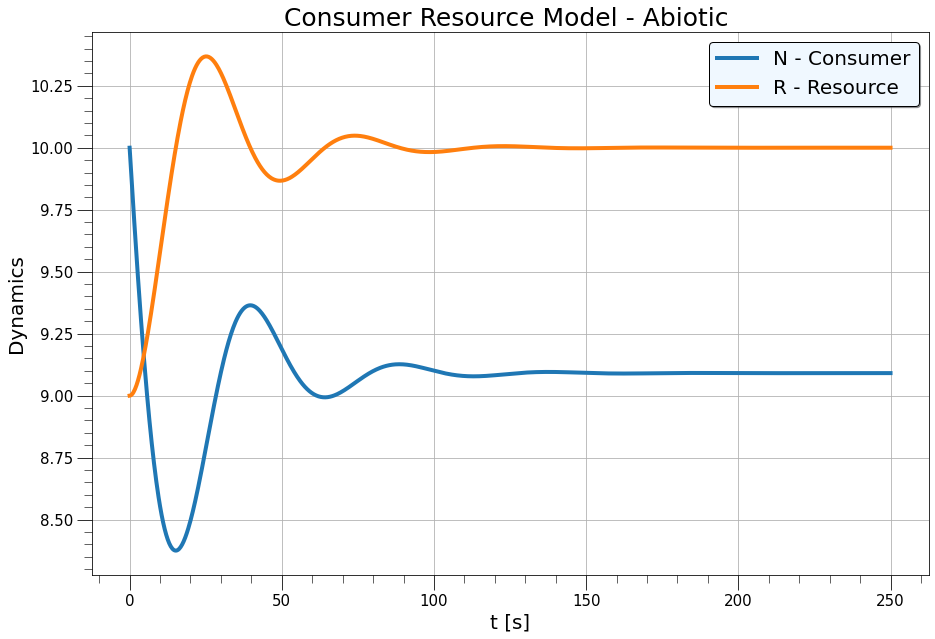

In [44]:
# plotting the result
fig , ax = plt.subplots(figsize=(15,10))

ax.plot(t, solution[:,0], linewidth = 4, label = 'N - Consumer')                # plot N - consumer to t 
ax.plot(t, solution[:,1], linewidth = 4, label = 'R - Resource')                          # plot Resource to t
ax.set_title('Consumer Resource Model - Abiotic ', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Dynamics', fontsize = 20)         

ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

In the Quasi Static Approximation, I suppose the resource to be constant at the equilibrium, so:


$$\dfrac{dR(t)}{dt} = 0  \rightarrow \bigg(\mu_{max} \cdot \dfrac{R(t)}{k_s + R(t)} - R(t) \cdot c \cdot N_t \bigg)\bigg\rvert_{R(t)=R^*} = 0$$


Solving for $R^*$

$$ \mu_{max} \cdot \dfrac{R^*}{k_s + R^*} - R^* \cdot c \cdot N_t = 0$$

that leads to:

$$R^* = \dfrac{\mu_{max} \cdot R^*}{c \cdot N_t \cdot (k_s + R^*)}   \rightarrow  \boxed{ R^* = \dfrac{\mu_{max} - ( c \cdot N(t) \cdot k_s)}{c \cdot N(t)} } $$


Substituting in the first equation for $\dfrac{dN(t)}{dt}$ in place of R we obtain:

$$
    \dfrac{dN(t)}{dt} = \gamma \cdot \mu_{max} - (\gamma \cdot c \cdot k_s + d) \cdot N(t)
$$

Calling:
$$\tilde{a} = \gamma \cdot \mu_{max}$$
$$\tilde{b} = \gamma \cdot c \cdot k_s + d$$

we arrive to the linear ordinary differential equation that follows:

$$
    \dfrac{dN(t)}{dt} = \tilde{a} - \tilde{b} \cdot N(t)
$$

which is the equation for the **logistic curve**, it can be solved until:

$$ \boxed{ N(t) = \dfrac{\tilde{a}}{\tilde{b}} + \left( N_0 - \dfrac{\tilde{a}}{\tilde{b}} \right) \cdot e^{-\tilde{b} t} }$$


## QSA Simulation

In [46]:
from scipy.integrate import odeint

#parameters of the model

c = 1/100        # consumption rate
gamma = 2      #"efficiency" of the consumer
d = 1/5          # death rate

#new parameters for abiotic model

mu_max = 1   #maximum growth rate
k_s = 1       #saturation constant

def N_qsa_evol(N0, t, mu_max , k_s, c, gamma, d):
    a_tilde = gamma*mu_max
    b_tilde = ((gamma * c * k_s) + d)
    return a_tilde/b_tilde + (N0 - a_tilde/b_tilde)*np.exp(-b_tilde*t)
           
time_vec = np.linspace(0, 250, 1000)
Ninit = 10

N_qsa = N_qsa_evol(Ninit, time_vec, mu_max , k_s, c, gamma, d)

R_qsa = (mu_max - (c*N_qsa*k_s))/(c*N_qsa)

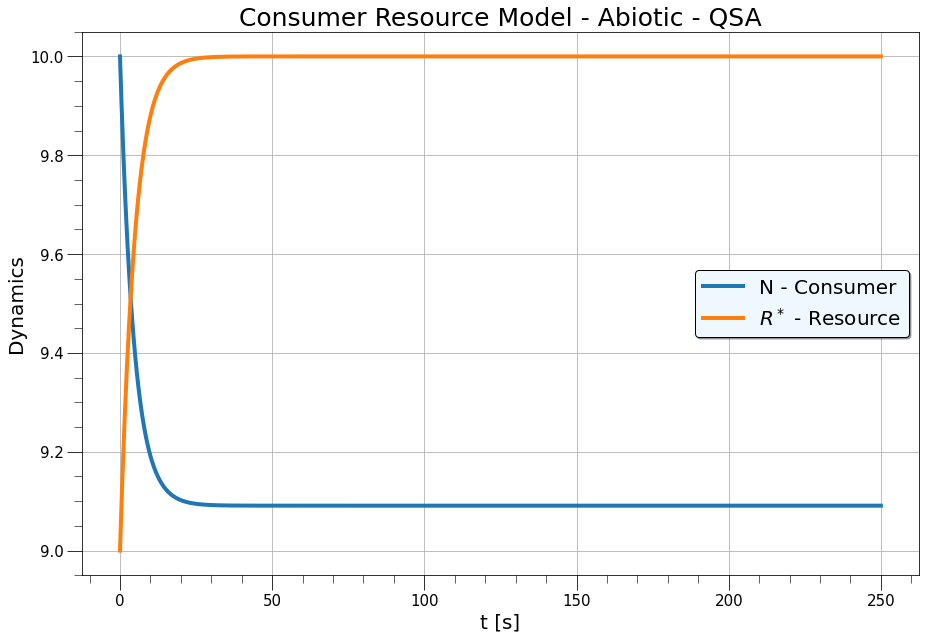

In [47]:
# plotting the result
fig , ax = plt.subplots(figsize=(15,10))

ax.plot(time_vec, N_qsa, linewidth = 4, label = 'N - Consumer')    # plot N - consumer to t 

ax.plot(time_vec, R_qsa, linewidth = 4, label = '$R^*$ - Resource')    # plot Resource to t

ax.set_title('Consumer Resource Model - Abiotic - QSA', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Dynamics', fontsize = 20)         

ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

## Union of Full solution and QSA

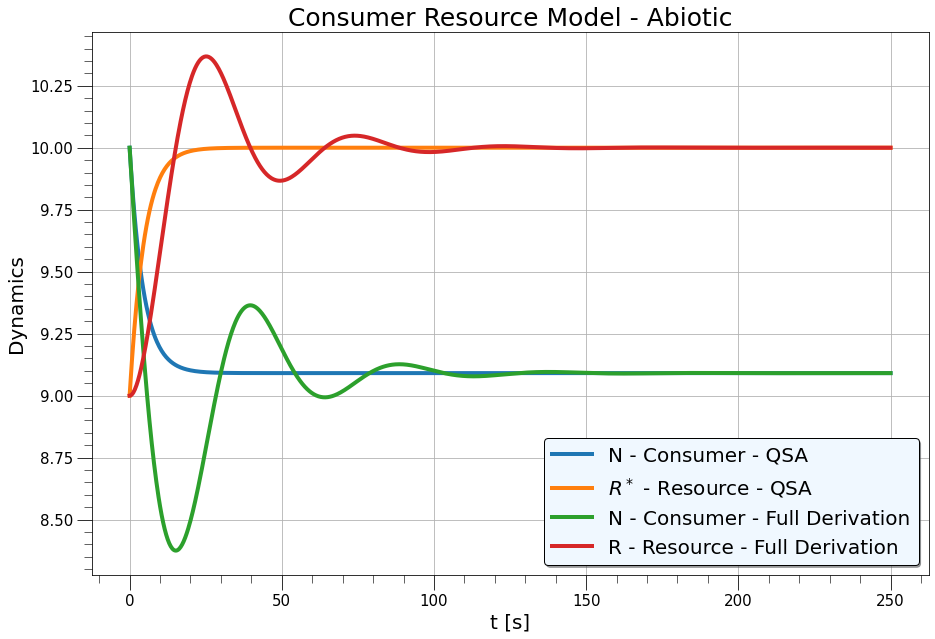

In [48]:
# plotting the result
fig , ax = plt.subplots(figsize=(15,10))

#QSA
ax.plot(time_vec, N_qsa, linewidth = 4, label = 'N - Consumer - QSA')    # plot N - consumer to t 
ax.plot(time_vec, R_qsa, linewidth = 4, label = '$R^*$ - Resource - QSA')    # plot Resource to t

#Full solution
ax.plot(t, solution[:,0], linewidth = 4, label = 'N - Consumer - Full Derivation')                # plot N - consumer to t 
ax.plot(t, solution[:,1], linewidth = 4, label = 'R - Resource - Full Derivation')

ax.set_title('Consumer Resource Model - Abiotic', fontsize = 25)    
ax.set_xlabel('t [s]', fontsize = 20)
ax.set_ylabel('Dynamics', fontsize = 20)         

ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

## Stochastic Differential Equation

We start from the **Stochastic Differential Equation** for the population dynamics subejected to the **Enviromental Noise**:

$$\dfrac{dx_i}{dt} = \dfrac{x_i}{\tau_i} \cdot \big( 1 - \dfrac{x_i}{\tau_i} \big) + \sqrt{\dfrac{\sigma}{\tau_i}} \cdot x_i \cdot \xi_i(t)  $$

Considering the general form of the Langevin equation:
$$ \dot{x} = A(x) + \sqrt{B(x)} \cdot \xi(t) $$

In our case:

$$ A(x) = \dfrac{x}{\tau} \cdot \big(1 - \dfrac{x}{k} \big) $$
$$ B(x) = \dfrac{\sigma}{\tau} \cdot x^2$$

where $\tau$ is the **characteristic time** of the population dynamics, $k$ is the **carrying capacity** and $\sigma$ is the **noise intensity**.

From this we can write the associated **Fokker-Planck equation**:

$$\boxed{ \dfrac{\partial P(x,t)}{\partial t} = - \dfrac{\partial}{\partial x} \bigg[ \underbrace{\dfrac{x}{\tau} \cdot \big(1 - \dfrac{x}{k}}_{A(x)} \big) \cdot P(x,t) \bigg] + \dfrac{1}{2} \dfrac{\partial^2}{\partial x^2} \bigg[ \underbrace{\dfrac{\sigma}{\tau} \cdot x^2}_{B(x)} \cdot P(x,t) \bigg]} $$

where $P(x,t)$ is the probability density function of the population at time $t$.

The next step is to solve this equation with a stationary solution, $J(x)$, that is a function of $x$, constant in time: 

$$J(x) = - \bigg[ \dfrac{x}{\tau} \cdot \big(1 - \dfrac{x}{k} \big) \bigg] \cdot P(x,t) + \dfrac{1}{2} \dfrac{\partial}{\partial x} \bigg[ \dfrac{\sigma}{\tau} \cdot x^2 \cdot P(x,t) \bigg] $$

satisfying the following boundary conditions:

$$ \dfrac{\partial J(x)}{\partial x} = 0 \rightarrow \begin{cases}
J(x) = const \\
J(0) = 0
\end{cases}
 $$

we can obtain:

$$ -\bigg[ \dfrac{x}{\tau} \cdot \big(1 - \dfrac{x}{k} \big) \bigg] \cdot P(x,t) + \dfrac{1}{2} \dfrac{\partial}{\partial x} \bigg[ \dfrac{\sigma}{\tau} \cdot x^2 \cdot P(x,t) \bigg] = 0$$


After some algebraic manipulations we obtain the solution for the Fokker-Planck equation:

$$\boxed{P(x,t) = A \cdot exp \bigg \{ \dfrac{2}{\sigma} \cdot  \bigg [ \big( 1 - \sigma \big) ln(x) - \dfrac{1}{k} \cdot x \bigg] \bigg \} }$$

where $A$ is the integration constant which, due to the normalization, undergoes to this relation:

$$ \dfrac{1}{A} = \int exp \bigg \{ \dfrac{2}{\sigma} \cdot  \bigg [ \big( 1 - \sigma \big) ln(x) - \dfrac{1}{k} \cdot x \bigg] \bigg \} \quad \mathcal{d}x $$

This last integral can be solved by using the **Gamma function**:

$$ P(x,t) = \dfrac{1}{\Gamma \bigg( \dfrac{2}{\sigma} \bigg)} \cdot exp \bigg \{ \dfrac{2}{\sigma} \cdot  \bigg [ \big( 1 - \sigma \big) ln(x) - \dfrac{1}{k} \cdot x \bigg] \bigg \} $$

where $\Gamma$ is the **Gamma function**.